## Unbiased Coin

In [5]:
sample_space = {"Heads","Tails"}
def is_heads_or_tails(outcome): 
    return outcome in {'Heads', 'Tails'} 
def is_neither(outcome): 
    return not is_heads_or_tails(outcome)

def is_heads(outcome): 
    return outcome == 'Heads'
def is_tails(outcome): 
    return outcome == 'Tails'

def get_matching_event(event_condition, sample_space): 
    return set([outcome for outcome in sample_space if event_condition(outcome)])


event_conditions = [is_heads_or_tails, is_heads, is_tails, is_neither]
for event_condition in event_conditions:
    print(f"Event Condition: {event_condition.__name__}")
    event = get_matching_event(event_condition, sample_space) 
    print(f'Event: {event}\n')

def compute_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space) 
    return len(event) / len(generic_sample_space)

for event_condition in event_conditions:
    prob = compute_probability(event_condition, sample_space)
    name = event_condition.__name__
    print(f"Probability of event arising from '{name}' is {prob}")


def compute_event_probability(event_condition, generic_sample_space): 
    event = get_matching_event(event_condition, generic_sample_space) 
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)
    event_size = sum(generic_sample_space[outcome]
                 for outcome in event)
    return event_size / sum(generic_sample_space.values())


Event Condition: is_heads_or_tails
Event: {'Tails', 'Heads'}

Event Condition: is_heads
Event: {'Heads'}

Event Condition: is_tails
Event: {'Tails'}

Event Condition: is_neither
Event: set()

Probability of event arising from 'is_heads_or_tails' is 1.0
Probability of event arising from 'is_heads' is 0.5
Probability of event arising from 'is_tails' is 0.5
Probability of event arising from 'is_neither' is 0.0


### Non Trivial Probability

In [7]:
possible_children = ['Boy', 'Girl']
from itertools import product
sample_space_efficient = set(product(possible_children, repeat=4))
sample_space_efficient 

{('Boy', 'Boy', 'Boy', 'Boy'),
 ('Boy', 'Boy', 'Boy', 'Girl'),
 ('Boy', 'Boy', 'Girl', 'Boy'),
 ('Boy', 'Boy', 'Girl', 'Girl'),
 ('Boy', 'Girl', 'Boy', 'Boy'),
 ('Boy', 'Girl', 'Boy', 'Girl'),
 ('Boy', 'Girl', 'Girl', 'Boy'),
 ('Boy', 'Girl', 'Girl', 'Girl'),
 ('Girl', 'Boy', 'Boy', 'Boy'),
 ('Girl', 'Boy', 'Boy', 'Girl'),
 ('Girl', 'Boy', 'Girl', 'Boy'),
 ('Girl', 'Boy', 'Girl', 'Girl'),
 ('Girl', 'Girl', 'Boy', 'Boy'),
 ('Girl', 'Girl', 'Boy', 'Girl'),
 ('Girl', 'Girl', 'Girl', 'Boy'),
 ('Girl', 'Girl', 'Girl', 'Girl')}

In [8]:
def has_two_boys(outcome): 
    return len([child for child in outcome if child == 'Boy']) == 2
prob = compute_event_probability(has_two_boys, sample_space_efficient)
print(f"Probability of 2 boys is {prob}")

Probability of 2 boys is 0.375


### Dice

In [9]:
possible_rolls = list(range(1,7))
sample_space_rolls = set(product(possible_rolls,repeat=6))
def has_sum_of_21(outcome): 
    return sum(outcome) == 21
prob = compute_event_probability(has_sum_of_21, generic_sample_space=sample_space_rolls) 
print(f"6 rolls sum to 21 with a probability of {prob}")

6 rolls sum to 21 with a probability of 0.09284979423868313


In [10]:
from collections import defaultdict
weighted_sample_space = defaultdict(int)
for outcome in sample_space_rolls:
    total = sum(outcome)
    weighted_sample_space[total] += 1
prob = compute_event_probability(lambda x: x==21, weighted_sample_space)
prob



0.09284979423868313

In [11]:
def is_in_interval(number,minimum,maximum):
    return minimum <= number <= maximum
prob = compute_event_probability(lambda x: is_in_interval(x,10,21),weighted_sample_space)
print(f"probability of of interval is {prob}") 

probability of of interval is 0.5446244855967078


In [12]:
def generate_coin_sample_space(num_flips=10):
    weighted_sample_space = defaultdict(int)
    for coin_flips in product(['Heads','Tails'],repeat=num_flips):
        heads_count = len([outcome for outcome in coin_flips if outcome=='Heads'])
        weighted_sample_space[heads_count] += 1
    return weighted_sample_space

weighted_sample_space = generate_coin_sample_space()
weighted_sample_space

defaultdict(int,
            {10: 1,
             9: 10,
             8: 45,
             7: 120,
             6: 210,
             5: 252,
             4: 210,
             3: 120,
             2: 45,
             1: 10,
             0: 1})

In [13]:
prob = compute_event_probability(lambda x: is_in_interval(x,8,10),weighted_sample_space)
print(f"probability of observing more than 7 heads is {prob}")

probability of observing more than 7 heads is 0.0546875


## Coin flips visualizations

In [1]:
import matplotlib.pyplot as plt


Text(0, 0.5, 'number of coin flip combinations with x heads')

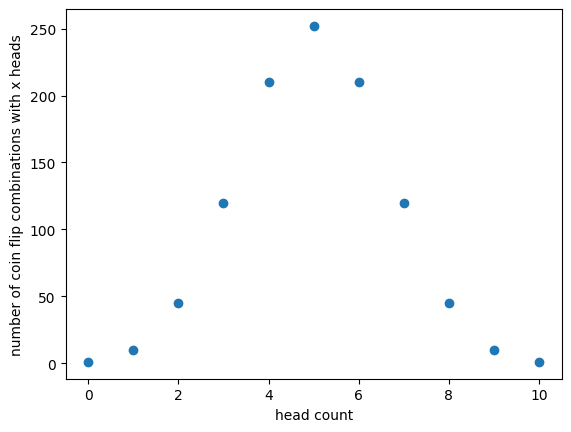

In [15]:
x_10_flips = list(weighted_sample_space)
y_10_flips = list(weighted_sample_space.values())
plt.scatter(x_10_flips,y_10_flips)
plt.xlabel("head count")
plt.ylabel("number of coin flip combinations with x heads")

Text(0, 0.5, 'Probability')

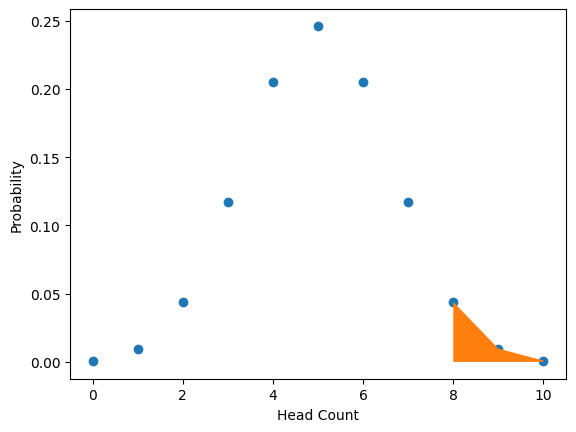

In [21]:
sample_space_size = sum(weighted_sample_space.values())
prob_x_10_flips = [value / sample_space_size for value in y_10_flips]
plt.scatter(x_10_flips,prob_x_10_flips)
where = [is_in_interval(value,8,10) for value in x_10_flips]
plt.fill_between(x_10_flips,prob_x_10_flips,where=where)
plt.xlabel("Head Count")
plt.ylabel("Probability")


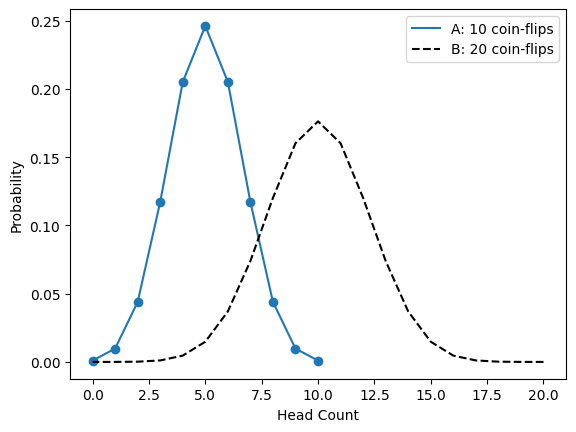

In [25]:
weighted_sample_space_20_flips= generate_coin_sample_space(num_flips=20)
x_20_flips = list(weighted_sample_space_20_flips.keys())
y_20_flips = [weighted_sample_space_20_flips[key] for key in x_20_flips]
sample_space_size = sum(weighted_sample_space_20_flips.values())
prob_x_20_flips = [value/sample_space_size for value in y_20_flips]
plt.plot(x_10_flips,prob_x_10_flips,label='A: 10 coin-flips')
plt.scatter(x_10_flips,prob_x_10_flips)
plt.plot(x_20_flips,prob_x_20_flips,color='black',linestyle='--',label='B: 20 coin-flips')
#plt.scatter(x_20_flips,prob_x_20_flips,color='k',marker='x')
plt.xlabel("Head Count")
plt.ylabel("Probability")
plt.legend()

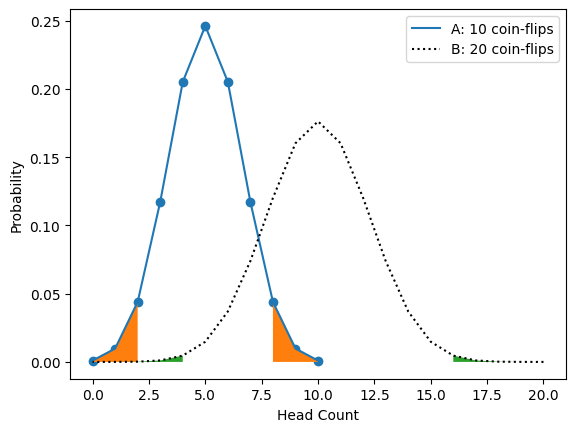

In [27]:


plt.plot(x_10_flips,prob_x_10_flips,label='A: 10 coin-flips')
plt.scatter(x_10_flips,prob_x_10_flips)
plt.plot(x_20_flips,prob_x_20_flips,color='black',linestyle=':',label='B: 20 coin-flips')
where_10 = [not is_in_interval(value,3,7) for value in x_10_flips]
plt.fill_between(x_10_flips,prob_x_10_flips,where=where_10)
where_20 = [not is_in_interval(value,5,15) for value in x_20_flips]
plt.fill_between(x_20_flips,prob_x_20_flips,where=where_20)
plt.xlabel("Head Count")
plt.ylabel("Probability")
plt.legend()

Text(0, 0.5, 'Probability')

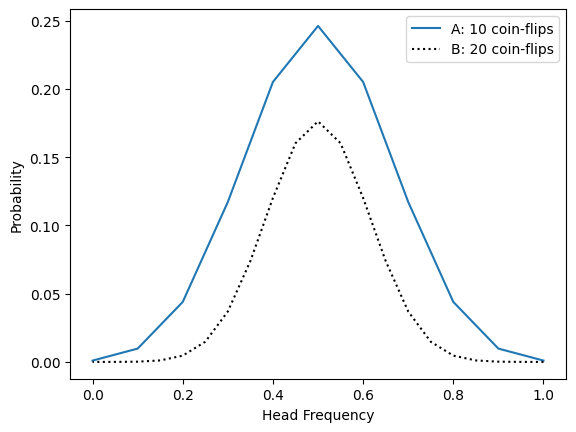

In [36]:
x_10_frequencies = [head_count/10 for head_count in x_10_flips]
x_20_frequencies = [head_count/20 for head_count in x_20_flips]
plt.plot(x_10_frequencies,prob_x_10_flips,label='A: 10 coin-flips')
plt.plot(x_20_frequencies,prob_x_20_flips,color='k',linestyle=':',label = 'B: 20 coin-flips')
plt.legend()
plt.xlabel("Head Frequency")
plt.ylabel("Probability")



Text(0, 0.5, 'relative likelihood')

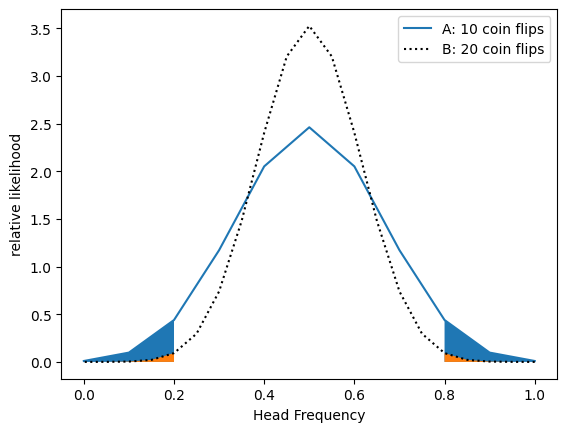

In [42]:
relative_likelihood_10 = [10* prob for prob in prob_x_10_flips]
relative_likelihood_20 = [20 * prob for prob in prob_x_20_flips]
plt.plot(x_10_frequencies,relative_likelihood_10,label='A: 10 coin flips')
plt.plot(x_20_frequencies,relative_likelihood_20,color='k',linestyle=':',label="B: 20 coin flips")
plt.plot()
plt.fill_between(x_10_frequencies,relative_likelihood_10,where=where_10)
plt.fill_between(x_20_frequencies,relative_likelihood_20,where=where_20)
plt.legend()
plt.xlabel("Head Frequency")
plt.ylabel("relative likelihood")